# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [24]:
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/gnaneshwari1802/NareshDataScienceTasksAndProjects/main/21.%20Artificial%20Neural%20Networks/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [26]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# classifier.add(Dense(units=1,activation='relu'))


In [ ]:
# # Adding the input layer and the first hidden layer

# classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu',input_dim = 11))
# # 1st HL i will consider for 6 neurons, init - initiliazaton parameter, weights need to be initialise, 
# #classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
# #classifier.add(Dropout(0.3))

# # Adding the second hidden layer
# #classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 11, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.4))

# # Adding the third hidden layer

# classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.2))

# # Adding the output layer
# #classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


# # Compiling the ANN
# classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# # Fitting the ANN to the Training set
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)
# # reason why i take validation_split because test my data separately



## Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [21]:
model_history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
# model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8609
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8589
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8609
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8616
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8614
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8619
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8609
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8624
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8616
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3371 - accura

In [22]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

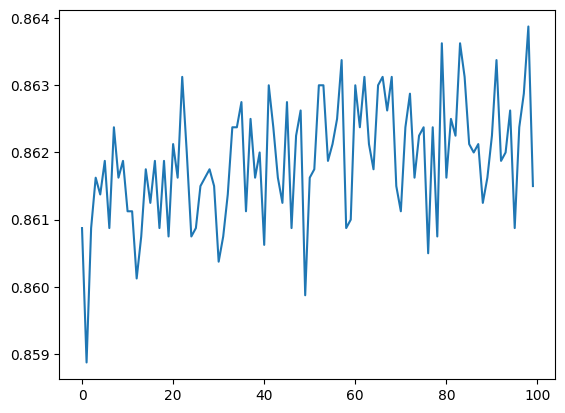

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

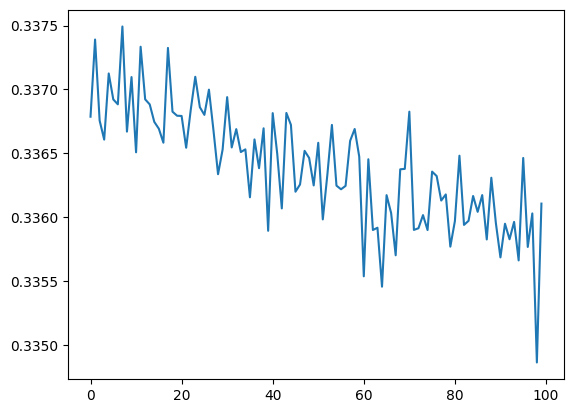

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# summarize history for accuracy
if 'accuracy' in model_history.history:
    train_acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
elif 'acc' in model_history.history:
    train_acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']

# Plot accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# This code will check for both 'accuracy' and 'acc' keys in model_history and plot the appropriate accuracy based on which key is found.

# Make sure to use the correct key depending on your specific TensorFlow/Keras version.




# Was this response better or worse?

# Better

# Worse

# Same




KeyError: 'val_accuracy'

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1507   88]
 [ 193  212]]


In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [34]:
score

0.8595